In [1]:
%pylab inline
%matplotlib inline

import os
os.chdir("/Users/Bya/git/predictEPL/MyFunctions/")
from dataIO import csv_dic_df

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/Bya/git/predictEPL/utils/")
sys.path.append("/Users/Bya/git/predictEPL/config/")
sys.path.append("/Users/Bya/git/predictEPL/WebScrapping/")

import paths
import my_plot
import scrap_espn_gamecast


from useful_methods import FolderFiles
from useful_methods import csv_dic_df
from useful_methods import FilterDF
from useful_methods import PreprocessingTweet
from useful_methods import EmolexDic
from useful_methods import CreateEmolexDF

Populating the interactive namespace from numpy and matplotlib


In [2]:
dic_emolex, dic_emolex_stemmed = EmolexDic()

All Words: 14182


In [4]:
# choosing data
week = str(13)
GW = 'GW' + week
filenames = FolderFiles(GW + '/SingleGames', paths.READ_PATH_EXTRACTED_CSV, ends='.csv')
filenames

['Chelsea_vs_Norwich.csv',
 'City_vs_Liverpool.csv',
 'Crystal_vs_Sunderland.csv',
 'Everton_vs_Villa.csv',
 'Newcastle_vs_Leicester.csv',
 'Southampton_vs_Stoke.csv',
 'Swansea_vs_Bournemouth.csv',
 'Tottenham_vs_WestHam.csv',
 'WestBromwich_vs_Arsenal.csv']

In [5]:
GW = 'GW' + week
os.chdir(paths.READ_PATH_EXTRACTED_CSV + GW + '/SingleGames')
df = csv_dic_df(filenames[1])
df.head()

,date,ith_minute,side,status,tags,text,text_status,user,user_status
0,Sat Nov 21 17:27:29 +0000 2015,-2,away,retweet,lfc,Boos from the away end as Sterling's name is r...,normal,ryanyoxall,normal
1,Sat Nov 21 17:27:29 +0000 2015,-2,home,retweet,mcfc,"Not saying it's cold at the Etihad today, but....",normal,dancercology_,normal
2,Sat Nov 21 17:27:29 +0000 2015,-2,away,tweet,"lfc,longneck",Is it just me that thinks this is a bad photos...,normal,joeforro,normal
3,Sat Nov 21 17:27:30 +0000 2015,-2,both,retweet,"lfc,mcfc",The #LFC and #MCFC players are out on the pitc...,normal,superabuan,normal
4,Sat Nov 21 17:27:30 +0000 2015,-2,both,retweet,"mcfc,lfc,cityvliverpool",TEAM NEWS: Here's your #MCFC side to play #LFC...,normal,adamnerdian,normal


In [6]:
# [Filter] DF
dfFilter = FilterDF(df)

In [7]:
# [Filtered] All, Non-Retweet
dfFilterEmolex = CreateEmolexDF(dfFilter, dic_emolex, dic_emolex_stemmed)
dfFilterEmolexNonRetweet = CreateEmolexDF(dfFilter[dfFilter['status'] != 'retweet'], dic_emolex, dic_emolex_stemmed)

In [8]:
# [Filtered] Home, Away
dfFilterEmolexHome = CreateEmolexDF(dfFilter[dfFilter['side'] == 'home'], dic_emolex, dic_emolex_stemmed)
dfFilterEmolexAway = CreateEmolexDF(dfFilter[dfFilter['side'] == 'away'], dic_emolex, dic_emolex_stemmed)

In [9]:
# [Filtered, Non ReTweet] Home, Away
dfFilterEmolexNonRtHome = CreateEmolexDF(dfFilter[(dfFilter['side'] == 'home') & (dfFilter['status'] != 'retweet')], dic_emolex, dic_emolex_stemmed)
dfFilterEmolexNonRtAway = CreateEmolexDF(dfFilter[(dfFilter['side'] == 'away') & (dfFilter['status'] != 'retweet')], dic_emolex, dic_emolex_stemmed)

In [11]:
# Scrap Gamecast
# url = 'http://www.espnfc.us/gamecast/422508/gamecast.html' # Bournemouth_vs_United
# url = 'http://www.espnfc.us/gamecast/422509/gamecast.html' # Tottenham_vs_Newcastle
url = 'http://www.espnfc.us/gamecast/422539/gamecast.html' # City_vs_Liverpool
dfGameCast = scrap_espn_gamecast.CreateEspnLiveCommentDF(url)

[Match]: Manchester City VS Liverpool
[Scrap Done]: 1.55 sec


In [17]:
dfGameCast.head()

,minute,comment,side,comment_status
0,,First Half begins.,neutral,neutral
1,,Lineups are announced and players are warming up.,neutral,neutral
2,4,"Corner, Manchester City. Conceded by Adam Lal...",home,corner
3,4,Attempt blocked. Raheem Sterling (Manchester C...,home,attemp
4,4,"Offside, Manchester City. Eliaquim Mangala tri...",home,offside


In [13]:
goals_dic, attacks_dic_home, attacks_dic_away, fouls_dic_home, fouls_dic_away = scrap_espn_gamecast.CreateGAFdics(dfGameCast)

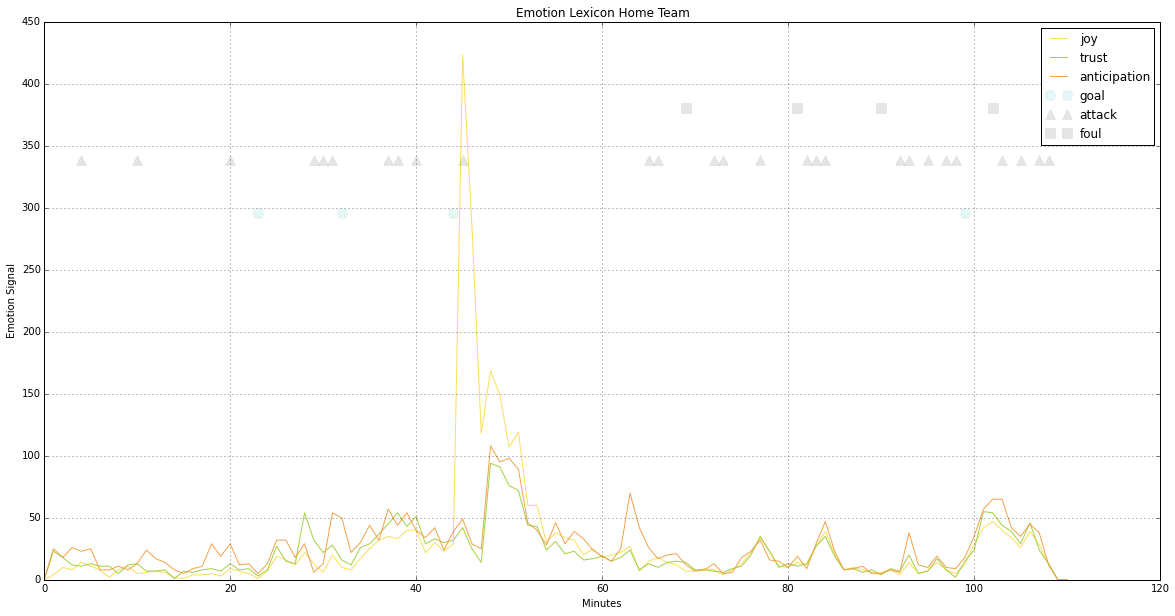

In [16]:
categorys = [
    'joy', 'trust', 'anticipation',
    'anger', 'fear', 'disgust', 'sadness',
    'surprise',
    'positive', 'negative',
]
colors = [
    '#fadb4d', '#99cc33', '#f2993a',
    '#e43054', '#35a450', '#9f78ba', '#729dc9',
    '#3fa5c0',
    'g', 'r',
]

my_plot.PlotLineChart(
    my_list_list=[
        list(dfFilterEmolexHome[categorys[0]]),
        list(dfFilterEmolexHome[categorys[1]]),
        list(dfFilterEmolexHome[categorys[2]]),
    ],
    labels=categorys,
    colors=[
        colors[0],
        colors[1],
        colors[2],
    ],
    title='Emotion Lexicon' + ' Home Team',
    xlabel='Minutes',
    ylabel='Emotion Signal',
    width=20,
    height=10,
    grid=True,
    vline=False,
    xlim=False,
    ylim=False,
    x_interval=False,
    y_interval=False,
    points=[goals_dic, attacks_dic_home, fouls_dic_home],
)